## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


In [1]:
# naimportovanie potrebných knižníc:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [2]:
# načítanie dát, odstránenie stĺpca 'CustomerID' a nepomenovaného stĺpca obsahujúceho poradové číslo od 0 do 7042:

T_data = pd.read_csv('../data/Telecom-Churn.csv')
T_data.drop(columns=['CustomerID', 'Unnamed: 0'], inplace = True)
T_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [3]:
# základné štatistiky číselných atribútov 'Tenure', 'MonthlyCharges' a 'TotalCharges':

print(T_data[['Tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            Tenure  MonthlyCharges  TotalCharges
count  7043.000000     7017.000000   7032.000000
mean     32.371149       64.707482   2283.300441
std      24.559481       30.105503   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.400000    401.450000
50%      29.000000       70.300000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


C:\Users\Vladislava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Vladislava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Vladislava\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


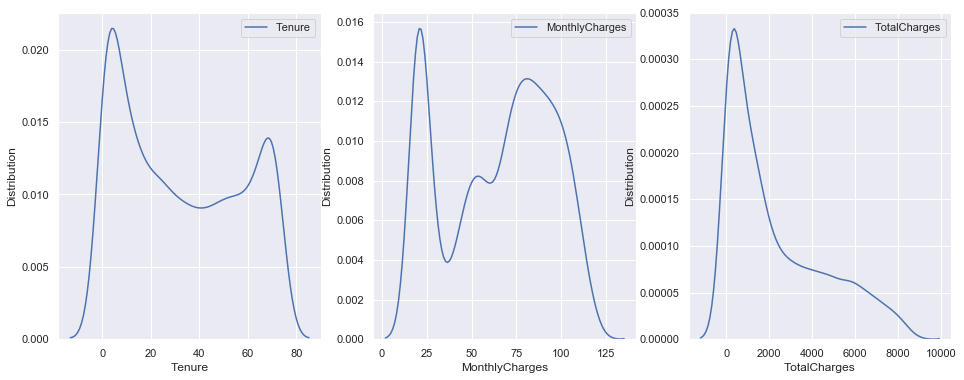

In [4]:
# vizualizácia distribúcie pravdepodobnosti výskytu hodnôt číselných atribútov 'Tenure', 'MonthlyCharges' a 'TotalCharges':

fig, ax =plt.subplots(1,3, figsize= (16,6))
for g, subplot in zip(['Tenure', 'MonthlyCharges', 'TotalCharges'], ax.flatten()):
    sns.kdeplot(T_data[g], ax= subplot).set(xlabel = g, ylabel = 'Distribution')
fig.show()

In [5]:
# početnosť hodnôt nominálnych/ordinálnych atribútov (keďže štatistika považuje binárne dáta za špeciálny prípad
# nominálnych dát, počítané sú aj početnosti binárnych atribútov):

for g in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    print(T_data[g].value_counts())
    print('')

Male      3555
Female    3488
Name: Gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4921
Yes    2102
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

C:\Users\Vladislava\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


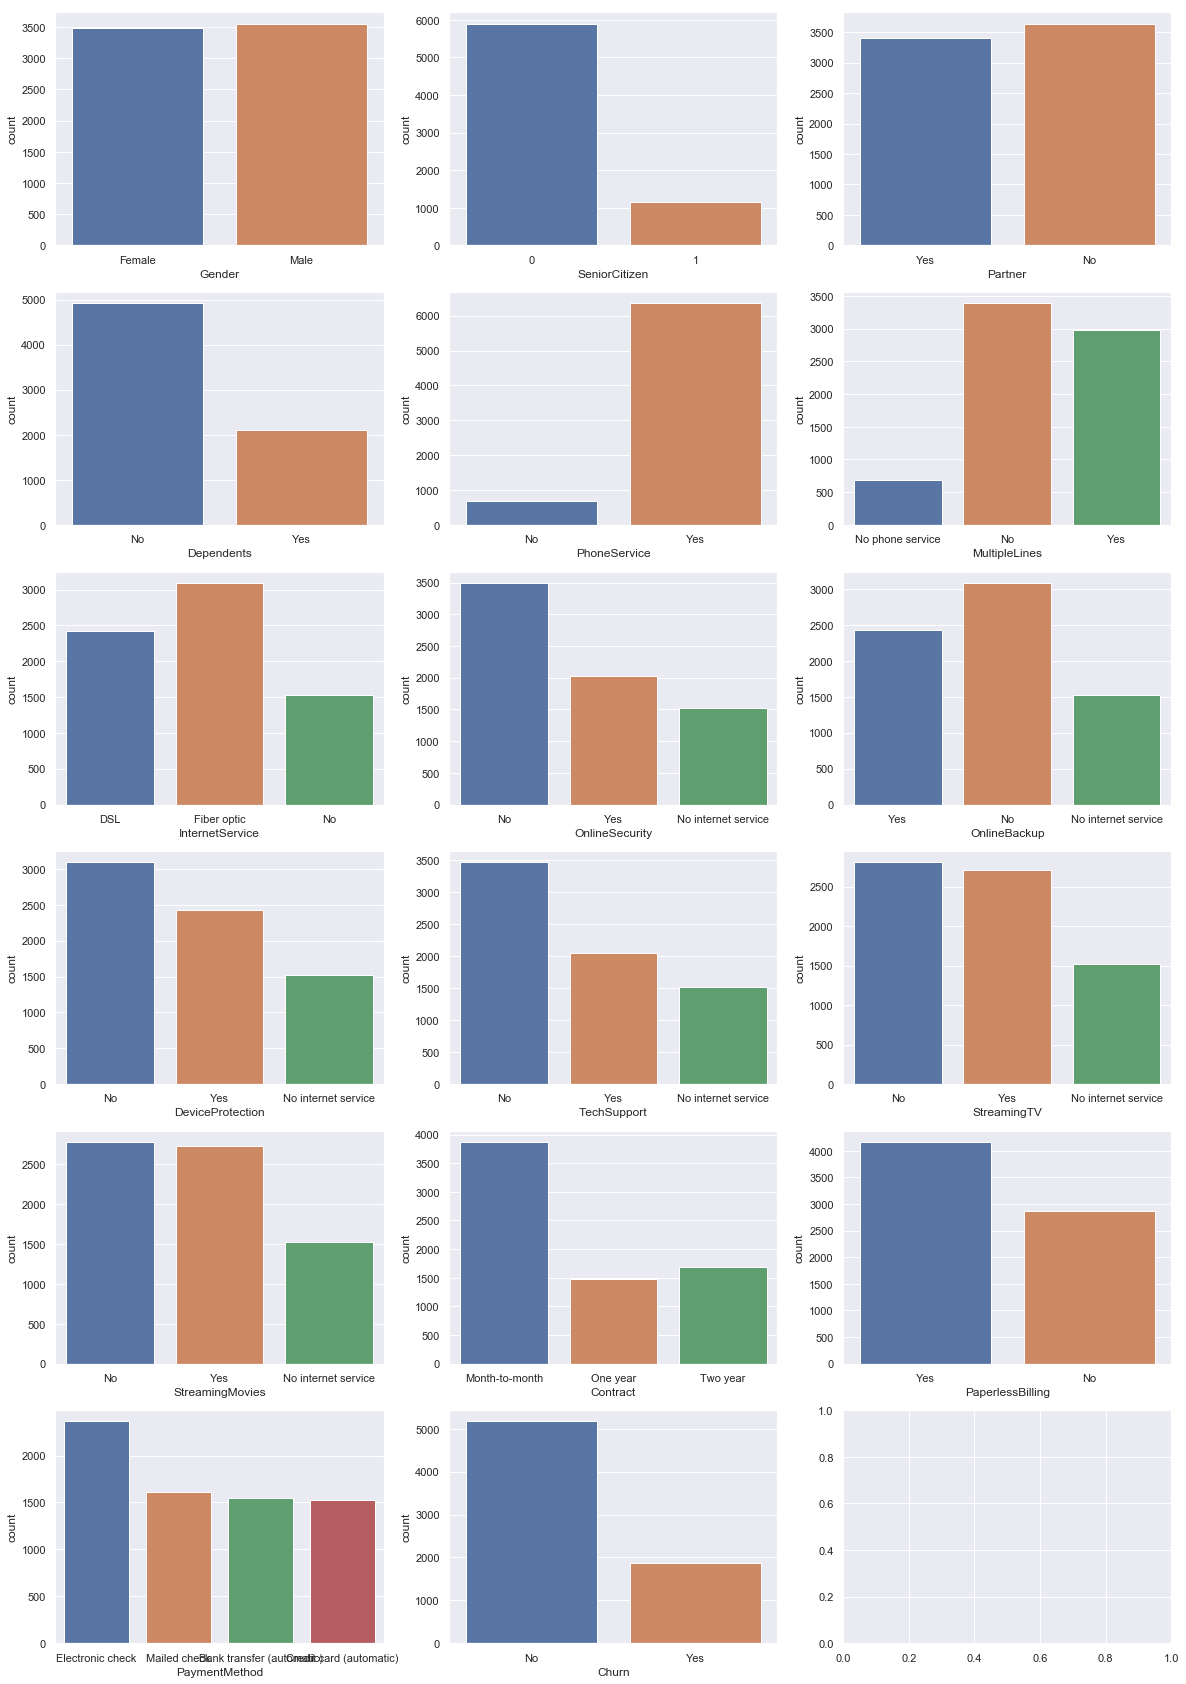

In [6]:
# histogramy nominálnych/ordinálnych atribútov (+ binárne atribúty ako špeciálny prípad nominálnych atribútov):

fig, ax =plt.subplots(6,3, figsize= (20,30))
for g, subplot in zip(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], ax.flatten()):
    sns.countplot(T_data[g], ax= subplot)
fig.show()

In [7]:
# počet chýbajúcich hodnôt včetkých atribútov:

for x in T_data.columns:
    print('Počet chýbajúcich hodnôt atribútu "', x, '":', T_data[x].isna().sum())

Počet chýbajúcich hodnôt atribútu " Gender ": 0
Počet chýbajúcich hodnôt atribútu " SeniorCitizen ": 0
Počet chýbajúcich hodnôt atribútu " Partner ": 0
Počet chýbajúcich hodnôt atribútu " Dependents ": 20
Počet chýbajúcich hodnôt atribútu " Tenure ": 0
Počet chýbajúcich hodnôt atribútu " PhoneService ": 0
Počet chýbajúcich hodnôt atribútu " MultipleLines ": 0
Počet chýbajúcich hodnôt atribútu " InternetService ": 0
Počet chýbajúcich hodnôt atribútu " OnlineSecurity ": 0
Počet chýbajúcich hodnôt atribútu " OnlineBackup ": 0
Počet chýbajúcich hodnôt atribútu " DeviceProtection ": 0
Počet chýbajúcich hodnôt atribútu " TechSupport ": 0
Počet chýbajúcich hodnôt atribútu " StreamingTV ": 0
Počet chýbajúcich hodnôt atribútu " StreamingMovies ": 0
Počet chýbajúcich hodnôt atribútu " Contract ": 0
Počet chýbajúcich hodnôt atribútu " PaperlessBilling ": 0
Počet chýbajúcich hodnôt atribútu " PaymentMethod ": 0
Počet chýbajúcich hodnôt atribútu " MonthlyCharges ": 26
Počet chýbajúcich hodnôt atrib

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

Korelačná matica pre číselné atribúty:
                  Tenure  MonthlyCharges  TotalCharges
Tenure          1.000000        0.247732      0.825880
MonthlyCharges  0.247732        1.000000      0.651316
TotalCharges    0.825880        0.651316      1.000000



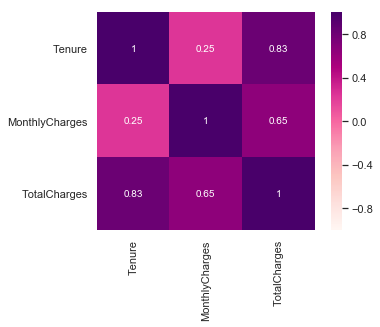

In [8]:
# korelačná matica číselných atribútov 'Tenure', 'MonthlyCharges' a 'TotalCharges':

numeric = T_data[['Tenure', 'MonthlyCharges', 'TotalCharges']]
corr_table = numeric.corr()

print('Korelačná matica pre číselné atribúty:')
print(corr_table)
print('')

# vykreslenie korelácie pomocou heatmapy:

q = sns.heatmap(corr_table,
               xticklabels= corr_table.columns, yticklabels= corr_table.columns,
               vmin= -1, vmax= 1,
               cmap= 'RdPu',
               annot= True,
               square= True)

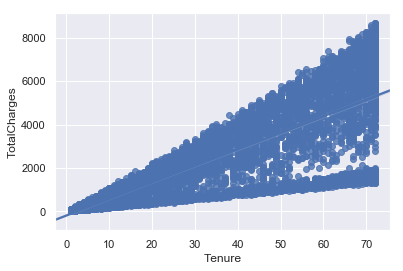

In [9]:
# z hodnôt korelačnej matice a grafu teplotnej mapy vyplýva, že najviac sú korelované atribúty "Tenure" a "TotalCharges"
# túto závislosť vieme zobraziť aj graficky:

q = sns.regplot(data= numeric, x= 'Tenure', y= 'TotalCharges')

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [10]:
# diskretizácia číselných atribútov 'MonthlyCharges' a 'TotalCharges' do 5 rovnako veľkých intervalov:

T_data['MonthlyCharges_ordinal'] = pd.cut(T_data['MonthlyCharges'], 5)
print('Atribút "MonthlyCharges" rozdelený na 5 rovnako veľkých intervalov:')
print(T_data['MonthlyCharges_ordinal'].value_counts())

print('')
T_data['TotalCharges_ordinal'] = pd.cut(T_data['TotalCharges'], 5)
print('Atribút "TotalCharges" rozdelený na 5 rovnako veľkých intervalov:')
print(T_data['TotalCharges_ordinal'].value_counts())

Atribút "MonthlyCharges" rozdelený na 5 rovnako veľkých intervalov:
(78.55, 98.65]     1817
(18.15, 38.35]     1797
(58.45, 78.55]     1361
(98.65, 118.75]    1042
(38.35, 58.45]     1000
Name: MonthlyCharges_ordinal, dtype: int64

Atribút "TotalCharges" rozdelený na 5 rovnako veľkých intervalov:
(10.134, 1752.0]    3937
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: TotalCharges_ordinal, dtype: int64


In [11]:
# diskretizácia číselného atribútu 'Tenure' na 5 intervalov s približne rovnakou početnosťou príkladov:

T_data['Tenure_ordinal'] = pd.qcut(T_data['Tenure'], 5)
print('Atribút "Tenure" rozdelený na 5 intervalov s približne rovnakou početnosťou príkladov:')
print(T_data['Tenure_ordinal'].value_counts())

Atribút "Tenure" rozdelený na 5 intervalov s približne rovnakou početnosťou príkladov:
(-0.001, 6.0]    1481
(20.0, 40.0]     1408
(60.0, 72.0]     1407
(6.0, 20.0]      1397
(40.0, 60.0]     1350
Name: Tenure_ordinal, dtype: int64


### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [12]:
T_data['Churn'] = T_data['Churn'].map({'Yes':1, 'No':0})

Kontingenčná tabuľka - závislosť medzi atribútmi "Tenure", "MonthlyCharges", "TotalCharges", "Churn":

                                                               Churn
Tenure_ordinal MonthlyCharges_ordinal TotalCharges_ordinal          
(-0.001, 6.0]  (18.15, 38.35]         (10.134, 1752.0]      0.307522
               (38.35, 58.45]         (10.134, 1752.0]      0.496970
               (58.45, 78.55]         (10.134, 1752.0]      0.649275
               (78.55, 98.65]         (10.134, 1752.0]      0.744337
               (98.65, 118.75]        (10.134, 1752.0]      0.833333
(6.0, 20.0]    (18.15, 38.35]         (10.134, 1752.0]      0.105000
               (38.35, 58.45]         (10.134, 1752.0]      0.237668
               (58.45, 78.55]         (10.134, 1752.0]      0.315113
               (78.55, 98.65]         (10.134, 1752.0]      0.571839
                                      (1752.0, 3485.2]      0.565217
               (98.65, 118.75]        (10.134, 1752.0]      0.728571


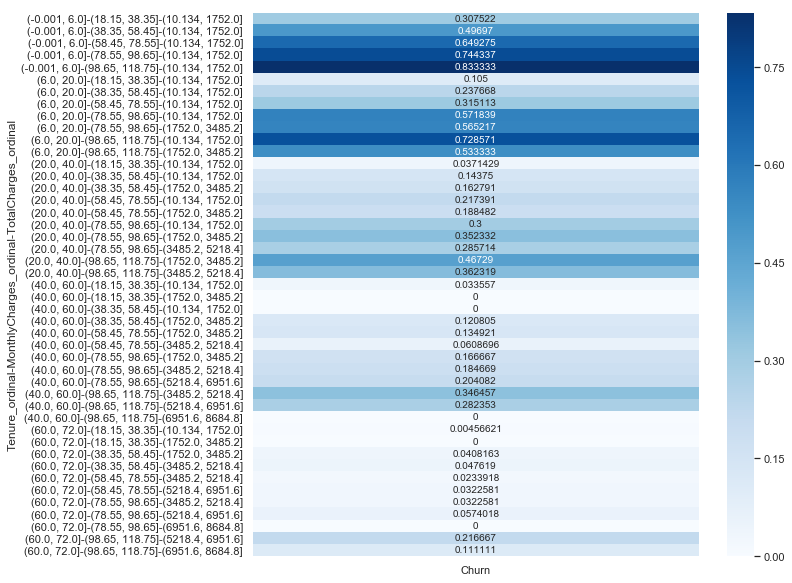

In [13]:
# závislosť medzi atribútmi 'Tenure', 'MonthlyCharges', 'TotalCharges' a atribútom 'Churn' + vizualizácia dát:

print('Kontingenčná tabuľka - závislosť medzi atribútmi "Tenure", "MonthlyCharges", "TotalCharges", "Churn":')
print('')

table1 = pd.pivot_table(T_data, index=['Tenure_ordinal', 'MonthlyCharges_ordinal', 'TotalCharges_ordinal'], values= 'Churn', aggfunc='mean')
print(table1)

fig, ax =plt.subplots(figsize= (10,10))
g = sns.heatmap(table1, annot=True, cbar=True, cmap="Blues", fmt='g', ax=ax)

Kontingenčná tabuľka - závislosť medzi atribútmi "Gender", "SeniorCitizen", "Churn":

SeniorCitizen         0         1       All
Gender                                     
Female         0.239384  0.422535  0.269209
Male           0.232808  0.411150  0.261603
All            0.236062  0.416813  0.265370

Väčšia závislosť je medzi atribútom 'SeniorCitizen', pravdepodobnosti odchodu používateľa od operátora sa výraznejšie odlišujú.


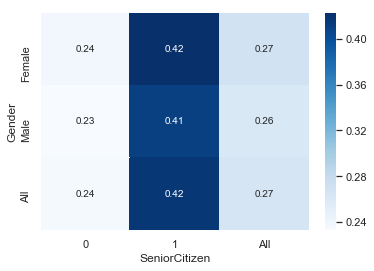

In [14]:
# závislosť medzi atribútmi 'Gender', 'SeniorCitizen' a atribútom 'Churn' + vizualizácia dát:

print('Kontingenčná tabuľka - závislosť medzi atribútmi "Gender", "SeniorCitizen", "Churn":')
print('')

table2 = pd.pivot_table(T_data, index=['Gender'], columns= 'SeniorCitizen', values= 'Churn', aggfunc='mean', margins= True)
print(table2)
g = sns.heatmap(table2, annot=True, cbar=True, cmap="Blues")

print('')
print("Väčšia závislosť je medzi atribútom 'SeniorCitizen', pravdepodobnosti odchodu používateľa od operátora sa výraznejšie odlišujú.", )

Krížová tabuľka pre atribúty "PhoneService", "InternetService", "StreamingTV", "StreamingMovies":

StreamingTV                                        No  No internet service  \
PhoneService InternetService StreamingMovies                                 
No           DSL             No                   299                    0   
                             Yes                   98                    0   
Yes          DSL             No                   814                    0   
                             Yes                  253                    0   
             Fiber optic     No                   905                    0   
                             Yes                  441                    0   
             No              No internet service    0                 1526   

StreamingTV                                        Yes  
PhoneService InternetService StreamingMovies            
No           DSL             No                     85  
                           

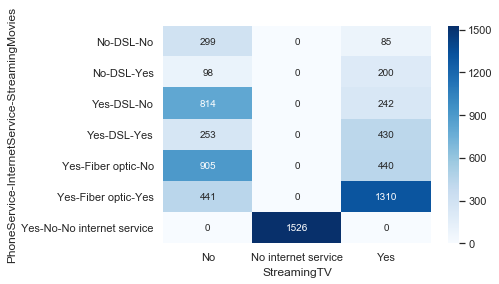

In [15]:
# početnosť rôznych kombinácií služieb pre atribúty 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies' + vizualizácia dát:

print('Krížová tabuľka pre atribúty "PhoneService", "InternetService", "StreamingTV", "StreamingMovies":')
print('')

table3 = pd.crosstab(index= [T_data['PhoneService'], T_data['InternetService'], T_data['StreamingMovies']], columns= [T_data['StreamingTV']])
print(table3)

g = sns.heatmap(table3, annot=True, cbar=True, cmap="Blues", fmt='g')

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [16]:
# nahradenie chýbajúcich hodnôt atribútu 'MonthlyCharges' v závislosti od atribútu 'TotalCharges' a 'Tenure':
# chýbajúca hodnota je určená ako podiel atribútov 'TotalCharges' a 'Tenure'

def replace_missing_MonthlyCharges(row):
    if pd.isna(row['MonthlyCharges']):
        return (row['TotalCharges'] / row['Tenure'])
    else:
        return row['MonthlyCharges']

# nahradenie chýbajúcich hodnôt

T_data['MonthlyCharges'] = T_data.apply(replace_missing_MonthlyCharges, axis = 1)

# overenie nahradenia - zistenie počtu chýbajúcich hodnôt atribútu 'MonthlyCharges'

T_data['MonthlyCharges'].isna().sum()

0

In [17]:
# nahradenie chýbajúcich hodnôt atribútu 'TotalCharges' na základe atribútu 'Tenure':

# pri každej chýbajúcej hodnote atribútu 'TotalCharges' je hodnota atribútu 'Tenure' rovná 0, pravdepodobne ide o nového
# používateľa, takže aj hodnota atribútu 'TotalCharges' by mala byť rovná 0:
# T_data_sel = T_data[T_data['TotalCharges'].isna()]

def replace_missing_TotalCharges(row):
    if pd.isna(row['TotalCharges']):
        return 0
    else:
        return row['TotalCharges']

# nahradenie chýbajúcich hodnôt

T_data['TotalCharges'] = T_data.apply(replace_missing_TotalCharges, axis = 1)

# overenie nahradenia - zistenie počtu chýbajúcich hodnôt atribútu 'TotalCharges'

T_data['TotalCharges'].isna().sum()

0

In [18]:
# nahradenie chýbajúce hodnoty v atribúte 'Dependents' v závislosti od atribútov 'Gender' a 'Partner':

# chýbajúce hodnoty boli nahradené na základe krížovej tabuľky a početnosti kombinácií atribútov 'Gender' a 'Partner'

table = pd.crosstab(index=[T_data['Gender'], T_data['Partner']], columns= T_data['Dependents'])

def replace_missing_Dependents(row):
    if pd.isna(row['Dependents']):
        if row['Gender'] == 'Female':
            if row['Partner'] == 'No':
                return 'No' 
            else:
                return 'Yes'
        else:
            if row['Partner'] == 'No':
                return 'No' 
            else:
                return 'Yes'
    else:
        return row['Dependents']

# nahradenie chýbajúcich hodnôt

T_data['Dependents'] = T_data.apply(replace_missing_Dependents, axis = 1)

# overenie nahradenia - zistenie počtu chýbajúcich hodnôt atribútu 'TotalCharges'

T_data['Dependents'].isna().sum()

0

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [19]:
# vytvorenie nového atribútu 'TotalMonthCharges':

T_data['TotalMonthCharges'] = T_data.eval('MonthlyCharges * Tenure')

# vytvorenie nového atribútu 'TotalRatio':

def ratio(row):
    if row['TotalMonthCharges'] < row['TotalCharges']:
        return -1
    elif row['TotalMonthCharges'] == row['TotalCharges']:
        return 0
    else:
        return 1

T_data['TotalRatio'] = T_data.apply(ratio, axis= 1)

# overenie nových atribútov

T_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,"(18.15, 38.35]","(10.134, 1752.0]","(-0.001, 6.0]",29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,"(38.35, 58.45]","(1752.0, 3485.2]","(20.0, 40.0]",1936.30,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,"(38.35, 58.45]","(10.134, 1752.0]","(-0.001, 6.0]",107.70,-1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,"(38.35, 58.45]","(1752.0, 3485.2]","(40.0, 60.0]",1903.50,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,"(58.45, 78.55]","(10.134, 1752.0]","(-0.001, 6.0]",141.40,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [20]:
# transformovanie kategorických atribútov:

# keďže sa medzi dátami nachádzajú atribúty 'PhoneService' a 'InternetService', ktoré nadobúdajú okrem iného hodnoty 'Yes' a 'No',
# priradila som atribútom, ktoré súvisia s atribútmi 'PhoneService' a 'InternetService' a nadobúdajú hodnoty 'No internet service'
# alebo 'No phone service' hodnotu atribútu 'No'

T_data['Gender'] = T_data['Gender'].map({"Female":1, "Male":0})
T_data['Partner'] = T_data['Partner'].map({'Yes':1, 'No':0})
T_data['Dependents'] = T_data['Dependents'].map({'Yes':1, 'No':0})
T_data['PhoneService'] = T_data['PhoneService'].map({'Yes':1, 'No':0})
T_data['MultipleLines'] = T_data['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':0})
T_data['OnlineSecurity'] = T_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['OnlineBackup'] = T_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['DeviceProtection'] = T_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['TechSupport'] = T_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['StreamingTV'] = T_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['StreamingMovies'] = T_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':0})
T_data['PaperlessBilling'] = T_data['PaperlessBilling'].map({'Yes':1, 'No':0})

T_data = pd.get_dummies(T_data, columns= ['InternetService', 'Contract',  'PaymentMethod', 'MonthlyCharges_ordinal',
                                          'TotalCharges_ordinal', 'Tenure_ordinal' ])

T_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,"TotalCharges_ordinal_(10.134, 1752.0]","TotalCharges_ordinal_(1752.0, 3485.2]","TotalCharges_ordinal_(3485.2, 5218.4]","TotalCharges_ordinal_(5218.4, 6951.6]","TotalCharges_ordinal_(6951.6, 8684.8]","Tenure_ordinal_(-0.001, 6.0]","Tenure_ordinal_(6.0, 20.0]","Tenure_ordinal_(20.0, 40.0]","Tenure_ordinal_(40.0, 60.0]","Tenure_ordinal_(60.0, 72.0]"
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [21]:
# normalizácia atribútov:

# klasifikačné modely Stromy, Naive Bayes a Random Forests nevyžadujú normalizáciu atribútov, tá je potrebná len pre model kNN

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normData = pd.DataFrame(scaler.fit_transform(T_data), index= T_data.index, columns= T_data.columns)
normData.head()

C:\Users\Vladislava\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,"TotalCharges_ordinal_(10.134, 1752.0]","TotalCharges_ordinal_(1752.0, 3485.2]","TotalCharges_ordinal_(3485.2, 5218.4]","TotalCharges_ordinal_(5218.4, 6951.6]","TotalCharges_ordinal_(6951.6, 8684.8]","Tenure_ordinal_(-0.001, 6.0]","Tenure_ordinal_(6.0, 20.0]","Tenure_ordinal_(20.0, 40.0]","Tenure_ordinal_(40.0, 60.0]","Tenure_ordinal_(60.0, 72.0]"
0,1.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# voľba atribútov pri tvorbe modelov:

# klasifikačné modely Stromy, Naive Bayes vyžadujú odstránenie redundantných atribútov, model Random Forests pracuje aj s redundantnými atribútmi
# redundantné atribúty som zvolila na základe modelu Random Forests (n_estimators= 1000), ten za najmenej významné považuje atribúty 
# 'MonthlyCharges_ordinal', 'TotalCharges_ordinal' a 'Tenure_ordinal', okrem týchto považujem za nadbytočné aj atribúty 'TotalRatio' a 'TotalMonthCharges',
# ktoré vznikli odvodením z atribútov 'MonthlyCharges', 'TotalCharges' a 'Tenure'

# model Random Forests:

# X_T_data = T_data.drop(columns= 'Churn', axis = 1)
# y_T_data = T_data['Churn']

# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators= 1000)
# rf.fit(X_T_data, y_T_data)

# sorted(zip(rf.feature_importances_, X_T_data.columns), reverse=True)

In [22]:
# odstránenie atribútov:

T_data = T_data.drop(columns= [    'MonthlyCharges_ordinal_(18.15, 38.35]',
                                   'MonthlyCharges_ordinal_(38.35, 58.45]',
                                   'MonthlyCharges_ordinal_(58.45, 78.55]',
                                   'MonthlyCharges_ordinal_(78.55, 98.65]',
                                   'MonthlyCharges_ordinal_(98.65, 118.75]',
                                   'TotalCharges_ordinal_(10.134, 1752.0]',
                                   'TotalCharges_ordinal_(1752.0, 3485.2]',
                                   'TotalCharges_ordinal_(3485.2, 5218.4]',
                                   'TotalCharges_ordinal_(5218.4, 6951.6]',
                                   'TotalCharges_ordinal_(6951.6, 8684.8]',
                                   'Tenure_ordinal_(-0.001, 6.0]',
                                   'Tenure_ordinal_(6.0, 20.0]', 
                                   'Tenure_ordinal_(20.0, 40.0]',
                                   'Tenure_ordinal_(40.0, 60.0]', 
                                   'Tenure_ordinal_(60.0, 72.0]',
                                   'TotalRatio', 'TotalMonthCharges'], axis = 1)

normData = normData.drop(columns= ['MonthlyCharges_ordinal_(18.15, 38.35]',
                                   'MonthlyCharges_ordinal_(38.35, 58.45]',
                                   'MonthlyCharges_ordinal_(58.45, 78.55]',
                                   'MonthlyCharges_ordinal_(78.55, 98.65]',
                                   'MonthlyCharges_ordinal_(98.65, 118.75]',
                                   'TotalCharges_ordinal_(10.134, 1752.0]',
                                   'TotalCharges_ordinal_(1752.0, 3485.2]',
                                   'TotalCharges_ordinal_(3485.2, 5218.4]',
                                   'TotalCharges_ordinal_(5218.4, 6951.6]',
                                   'TotalCharges_ordinal_(6951.6, 8684.8]',
                                   'Tenure_ordinal_(-0.001, 6.0]',
                                   'Tenure_ordinal_(6.0, 20.0]', 
                                   'Tenure_ordinal_(20.0, 40.0]',
                                   'Tenure_ordinal_(40.0, 60.0]', 
                                   'Tenure_ordinal_(60.0, 72.0]',
                                   'TotalRatio', 'TotalMonthCharges'], axis = 1)


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [23]:
from sklearn.model_selection import train_test_split

# rozdelenie dát pre modely Stromy, Naive Bayes a Random Forests:

X_T_data = T_data.drop(columns= 'Churn', axis = 1)
y_T_data = T_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_T_data, y_T_data, test_size= 0.3, random_state= 1)

# rozdelenie dát pre model kNN:

X_normData = normData.drop(columns= 'Churn', axis = 1)
y_normData = normData['Churn']

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normData, y_normData, test_size= 0.3, random_state= 1)


### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# model kNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_range = list(range(1, 40))
weights_range = ['uniform', 'distance']
metric_range = ['euclidean', 'manhattan']  

param_grid_kNN = dict(n_neighbors=k_range, weights=weights_range, metric=metric_range)

grid_kNN = GridSearchCV(estimator=knn, param_grid=param_grid_kNN, cv=5, scoring='accuracy')
grid_kNN.fit(X_train_norm, y_train_norm)

print('Najlepšia kombinácia parametrov modelu "kNN" je:')
print(grid_kNN.best_params_)
print()
print('Hodnota presnosti modelu "kNN" pri tejto kombinácii je:')
print(grid_kNN.best_score_)

Model kNN - výsledky:

Najlepšia kombinácia parametrov modelu "kNN" je:
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}

Hodnota presnosti modelu "kNN" pri tejto kombinácii je:
0.7890466531440162

In [ ]:
# model DT

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6] 
min_samples_split_range = [2, 4, 6, 8, 10, 12]
min_samples_leaf_range = [1, 5, 10]
presort_range = [True, False]

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "decision_tree" je:')
print(grid_dt.best_params_)
print()
print('Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:')
print(grid_dt.best_score_)

Model DT - výsledky:

Najlepšia kombinácia parametrov modelu "decision_tree" je:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'presort': True}

Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:
0.7876267748478701

In [ ]:
# model RF

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

n_estimators_range = [100, 300, 500, 700, 900]
oob_score_range = [True, False]
criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6]
min_samples_split_range = [2, 4, 6]
min_samples_leaf_range = [1, 5, 10]

param_grid_rf = dict(n_estimators=n_estimators_range, oob_score=oob_score_range, criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "random_forests" je:')
print(grid_rf.best_params_)
print()
print('Hodnota presnosti modelu "random_forests" pri tejto kombinácii je:')
print(grid_rf.best_score_)

Model RF - výsledky:

Najlepšia kombinácia parametrov modelu "random_forests" je:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 700, 'oob_score': True}

Hodnota presnosti modelu "random_forests" pri tejto kombinácii je:
0.7987829614604463

In [ ]:
# model NB

# neparametrická metóda, nepoužijem GridSearch

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [24]:
from sklearn.metrics import roc_curve,auc

# model kNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors= 30, weights= 'uniform', metric= 'manhattan')
knn.fit(X_train_norm, y_train_norm)
y_knn=knn.predict(X_test_norm)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_norm, y_knn, pos_label=1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# model DT

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 5, min_samples_split= 4, presort= True)
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# model RF

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = RandomForestClassifier(n_estimators= 700, oob_score= True, criterion= 'gini', max_depth= 6, min_samples_split =  6, min_samples_leaf =  10)
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# model NB

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb=nb.predict(X_test)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_nb, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

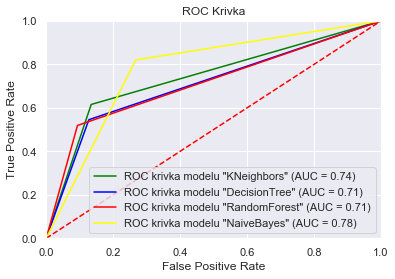

In [25]:
plt.title('ROC Krivka')

plt.plot(fpr_knn, tpr_knn, color='green', label = 'ROC krivka modelu "KNeighbors" (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_dt, tpr_dt, color='blue', label = 'ROC krivka modelu "DecisionTree" (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color='red', label = 'ROC krivka modelu "RandomForest" (AUC = %0.2f)' % roc_auc_rf) 
plt.plot(fpr_nb, tpr_nb, color='yellow', label = 'ROC krivka modelu "NaiveBayes" (AUC = %0.2f)' % roc_auc_nb) 

plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

# model kNN

print('Presnosť (accuracy) modelu "KNeighbors": %0.3f' % accuracy_score(y_test_norm, y_knn))
print('Presnosť (precision) modelu "KNeighbors": %0.3f' %  precision_score(y_test_norm, y_knn))
print('Návratnosť (recall) modelu "KNeighbors": %0.3f' %  recall_score(y_test_norm, y_knn))
print('')
cm_knn = confusion_matrix(y_test_norm, y_knn)
print(cm_knn)

Presnosť (accuracy) modelu "KNeighbors": 0.803
Presnosť (precision) modelu "KNeighbors": 0.604
Návratnosť (recall) modelu "KNeighbors": 0.616

[[1372  213]
 [ 203  325]]


In [27]:
# model DT

print('Presnosť (accuracy) modelu "DecisionTree": %0.3f' % accuracy_score(y_test, y_dt))
print('Presnosť (precision) modelu "DecisionTree": %0.3f' % precision_score(y_test, y_dt))
print('Návratnosť (recall) modelu "DecisionTree": %0.3f' % recall_score(y_test, y_dt))
print('')
cm_dt = confusion_matrix(y_test, y_dt)
print(cm_dt)

Presnosť (accuracy) modelu "DecisionTree": 0.791
Presnosť (precision) modelu "DecisionTree": 0.588
Návratnosť (recall) modelu "DecisionTree": 0.545

[[1383  202]
 [ 240  288]]


In [28]:
# model RF

print('Presnosť (accuracy) modelu "RandomForest": %0.3f' % accuracy_score(y_test, y_rf))
print('Presnosť (precision) modelu "RandomForest": %0.3f' % precision_score(y_test, y_rf))
print('Návratnosť (recall) modelu "RandomForest": %0.3f' % recall_score(y_test, y_rf))
print('')
cm_rf = confusion_matrix(y_test, y_rf)
print(cm_rf)

Presnosť (accuracy) modelu "RandomForest": 0.810
Presnosť (precision) modelu "RandomForest": 0.649
Návratnosť (recall) modelu "RandomForest": 0.519

[[1437  148]
 [ 254  274]]


In [29]:
# model NB

print('Presnosť (accuracy) modelu "NaiveBayes": %0.3f' % accuracy_score(y_test, y_nb))
print('Presnosť (precision) modelu "NaiveBayes": %0.3f' % precision_score(y_test, y_nb))
print('Návratnosť (recall) modelu "NaiveBayes": %0.3f' % recall_score(y_test, y_nb))
print('')
cm_nb = confusion_matrix(y_test, y_nb)
print(cm_nb)

Presnosť (accuracy) modelu "NaiveBayes": 0.754
Presnosť (precision) modelu "NaiveBayes": 0.505
Návratnosť (recall) modelu "NaiveBayes": 0.820

[[1161  424]
 [  95  433]]


In [30]:
# vykreslenie modelu rozhodovacích stromov:

from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_T_data.columns.values, class_names=['0','1'], out_file=f)

In [31]:
# klasifikačné pravidlá pre identifikáciu odchádzajúcich zákazníkov

from sklearn.tree import _tree

def tree_to_code(tree, feature_names): 

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)
    
tree_to_code(dt, X_T_data.columns.values)

def tree(Gender, SeniorCitizen, Partner, Dependents, Tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, InternetService_DSL, InternetService_Fiber optic, InternetService_No, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check):
  if Contract_Month-to-month <= 0.5:
    if MonthlyCharges <= 93.67499923706055:
      if Contract_One year <= 0.5:
        if MonthlyCharges <= 24.475000381469727:
          if PaymentMethod_Bank transfer (automatic) <= 0.5:
            return [[232.   0.]]
          else:  # if PaymentMethod_Bank transfer (automatic) > 0.5
            return [[88.  1.]]
        else:  # if MonthlyCharges > 24.475000381469727
          if MonthlyCharges <= 24.774999618530273:
            return [[15.  2.]]
 

## Záver:

Použité modely a ich najlepšie kombinácie parametrov:

- model 'kNN' a najlepšia kombinácia parametrov:
    - {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}
- model 'DecisionTree' a najlepšia kombinácia parametrov:
    - {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'presort': True}
- model 'RandomForests' a najlepšia kombinácia parametrov: 
    - {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 700, 'oob_score': True}
- neparametrický model 'NaiveBayes'

Na základe testovania modelov na testovacej množine a porovnania ROC kriviek a AUC koeficientov (Úloha 11) je najlepším modelom model 'NaiveBayes' s hodnotou AUC koeficientu rovnou 0,78.

Testovací vektor cieľového atribútu y_test obsahuje 2113 hodnôt - 1585 s priradenou hodnotou 0 - zákazník zostáva u operátora, 528 s priradenou hodnotou 1 - zákazník odchádza od operátora. Porovnaním presností a návratnosti jednotlivých modelov najlepšie výsledky dosiahol model 'RandomForests'. Porovnanie hodnôt jednotlivých confusion matrix - z 528 hodnôt atribútu y_test so záverom, že zákazník odchádza od operátora model 'kNN' správne predikoval 325, model 'DecisionTree' 288, model 'RandomForests' 271 a model 'NaiveBayes' 433. Z tohto pohľadu je najlepším modelom model 'NaiveBayes'.